# LIBRERIAS

In [1]:
# CARGAR LIBRERIAS

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer
#from imblearn.over_sampling import SMOTE
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# DATOS

URL = https://www.kaggle.com/fedesoriano/stroke-prediction-dataset

**Context**

According to the World Health Organization (WHO) stroke is the 2nd leading cause of death globally, responsible for approximately 11% of total deaths.
This dataset is used to predict whether a patient is likely to get stroke based on the input parameters like gender, age, various diseases, and smoking status. Each row in the data provides relavant information about the patient.

**Attribute Information**

1) id: unique identifier

2) gender: "Male", "Female" or "Other"

3) age: age of the patient

4) hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension

5) heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease

6) ever_married: "No" or "Yes"

7) work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"

8) Residence_type: "Rural" or "Urban"

9) avg_glucose_level: average glucose level in blood

10) bmi: body mass index

11) smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*

12) stroke: 1 if the patient had a stroke or 0 if not

*Note: "Unknown" in smoking_status means that the information is unavailable for this patient

In [2]:
# CARGAR BASE DE DATOS

df = pd.read_csv('../BBDD/healthcare-dataset-stroke-data.csv')
df.head()

id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21   NaN     never smoked   
2        Private          Rural             105.92  32.5     never smoked   
3        Private          Urban             171.23  34.4           smokes   
4  Self-employed          Rural             174.12  24.0     never smoked   

   stroke  
0       1  
1       1  
2       1  
3       1  
4       1

# ANALISIS EXPLORATORIO DE DATOS

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [4]:
# BORRAR COLUMNA ID

df.drop(columns='id', inplace=True)

In [5]:
# COMPROBAR NANS Y SUS PORCENTAJES

print(df.isnull().sum())
print('')
print(df.isnull().sum() / len(df) * 100)

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

gender               0.000000
age                  0.000000
hypertension         0.000000
heart_disease        0.000000
ever_married         0.000000
work_type            0.000000
Residence_type       0.000000
avg_glucose_level    0.000000
bmi                  3.933464
smoking_status       0.000000
stroke               0.000000
dtype: float64


In [6]:
# COMPROBAR DUPLICADOS

df.duplicated().sum()

0

In [7]:
# ESTADISTICOS DEL DATAFRAME

round(df.describe(include='all'), 2)

gender      age  hypertension  heart_disease ever_married work_type  \
count     5110  5110.00        5110.0        5110.00         5110      5110   
unique       3      NaN           NaN            NaN            2         5   
top     Female      NaN           NaN            NaN          Yes   Private   
freq      2994      NaN           NaN            NaN         3353      2925   
mean       NaN    43.23           0.1           0.05          NaN       NaN   
std        NaN    22.61           0.3           0.23          NaN       NaN   
min        NaN     0.08           0.0           0.00          NaN       NaN   
25%        NaN    25.00           0.0           0.00          NaN       NaN   
50%        NaN    45.00           0.0           0.00          NaN       NaN   
75%        NaN    61.00           0.0           0.00          NaN       NaN   
max        NaN    82.00           1.0           1.00          NaN       NaN   

       Residence_type  avg_glucose_level      bmi smoking_status   stroke  
count            5110            5110.00  4909.00           5110  5110.00  
unique              2                NaN      NaN              4      NaN  
top             Urban                NaN      NaN   never smoked      NaN  
freq             2596                NaN      NaN           1892      NaN  
mean              NaN             106.15    28.89            NaN     0.05  
std               NaN              45.28     7.85            NaN     0.22  
min               NaN              55.12    10.30            NaN     0.00  
25%               NaN              77.24    23.50            NaN     0.00  
50%               NaN              91.88    28.10            NaN     0.00  
75%               NaN             114.09    33.10            NaN     0.00  
max               NaN             271.74    97.60            NaN     1.00

In [8]:
# LISTA DE COLUMNAS

df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

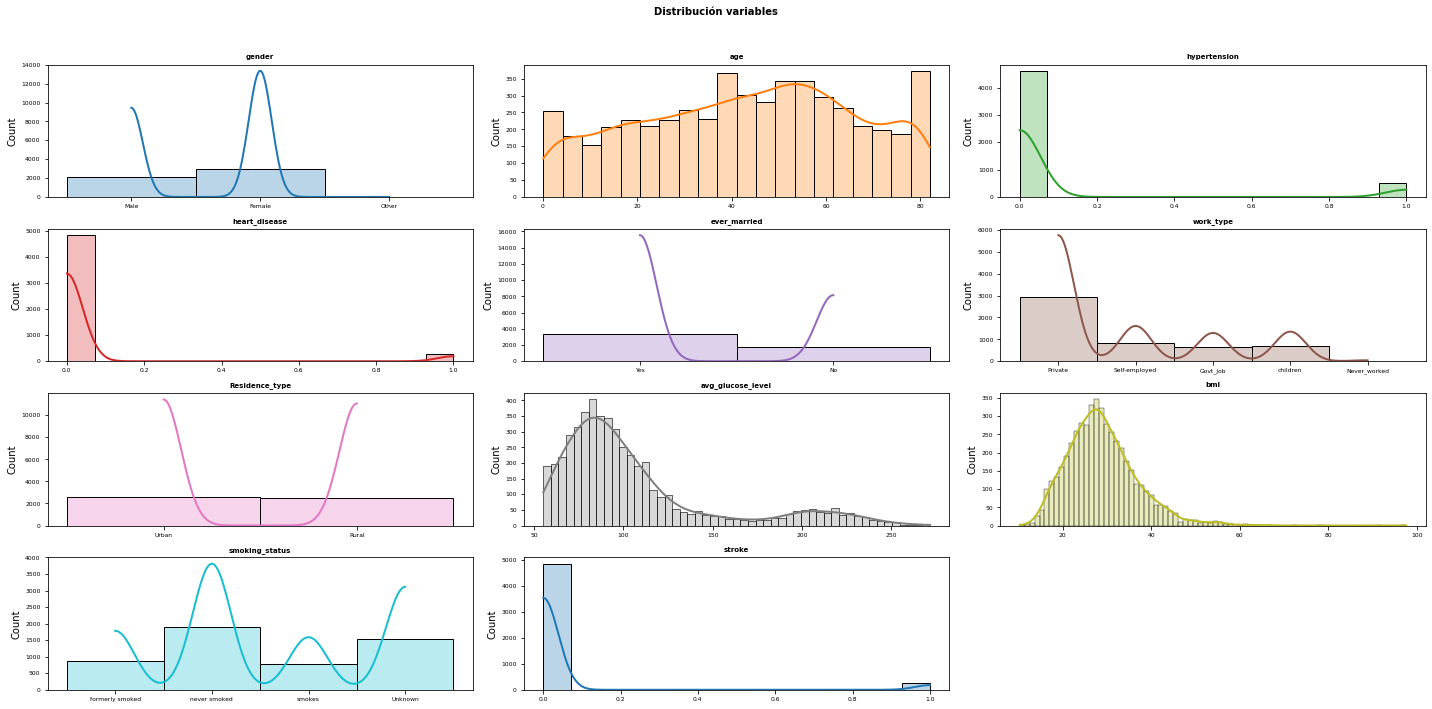

In [12]:
# DISTRIBUCION DE LAS VARIABLES

fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(20, 10))
axes = axes.flat
columnas = df.columns

for i, col in enumerate(columnas):
    sns.histplot(
        data=df,
        x=col,
        stat="count",
        kde=True,
        color=(list(plt.rcParams['axes.prop_cycle'])*2)[i]["color"],
        line_kws={'linewidth': 2},
        alpha= 0.3,
        ax=axes[i]
    )
    axes[i].set_title(col, fontsize=7, fontweight="bold")
    axes[i].tick_params(labelsize=6)
    axes[i].set_xlabel("")

fig.delaxes(axes[11]) # BORRAR FIGURA EN POSICION 11
    
fig.tight_layout()
plt.subplots_adjust(top =0.9)
fig.suptitle('Distribución variables', fontsize=10, fontweight="bold");

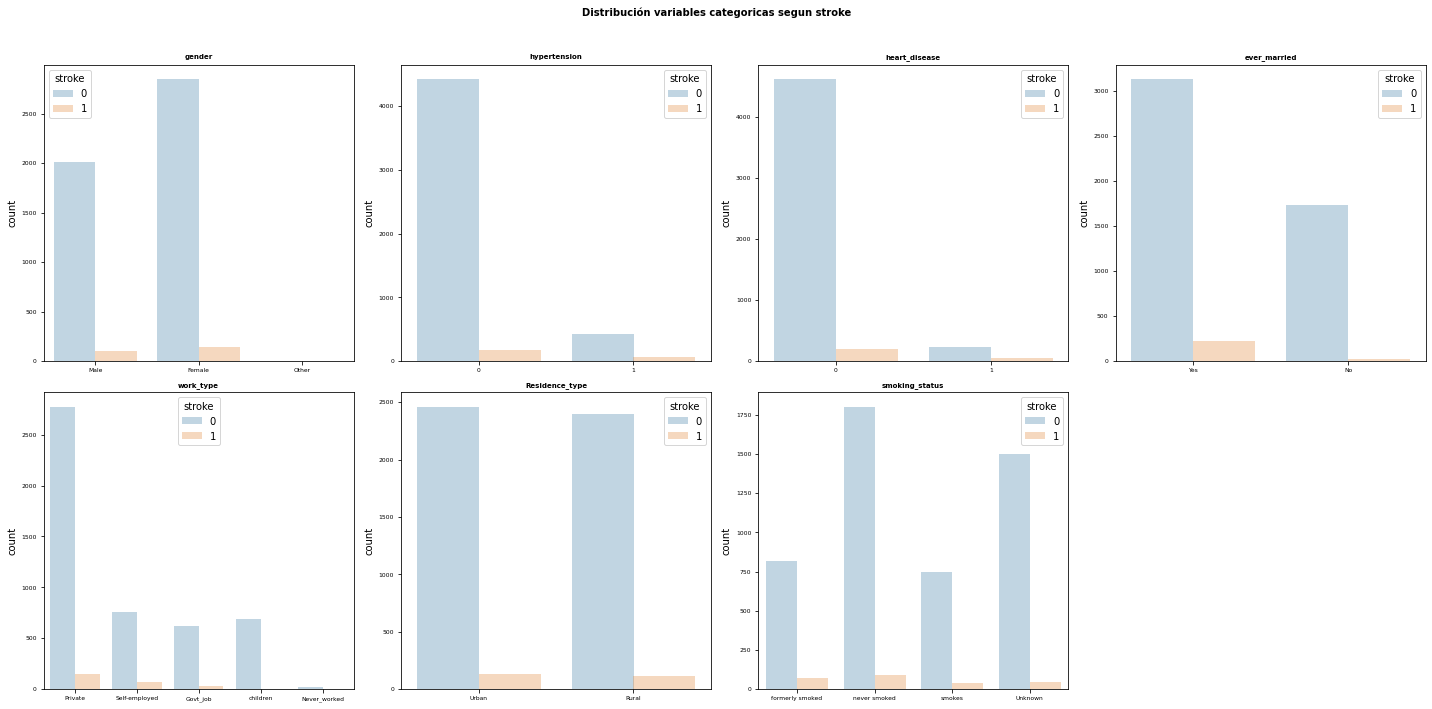

In [40]:
# DISTRIBUCION DE STROKE CON VARIABLES CATEGORICAS

fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 10))
axes = axes.flat
columnas = df[['gender', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'smoking_status']]

for i, col in enumerate(columnas):
    sns.countplot(
        data=df,
        x=col,
        hue='stroke',
        alpha= 0.3,
        ax=axes[i]
    )
    axes[i].set_title(col, fontsize=7, fontweight="bold")
    axes[i].tick_params(labelsize=6)
    axes[i].set_xlabel("")
   
fig.delaxes(axes[7]) # BORRAR FIGURA EN POSICION 7

fig.tight_layout()
plt.subplots_adjust(top =0.9)
fig.suptitle('Distribución variables categoricas segun stroke', fontsize=10, fontweight="bold");

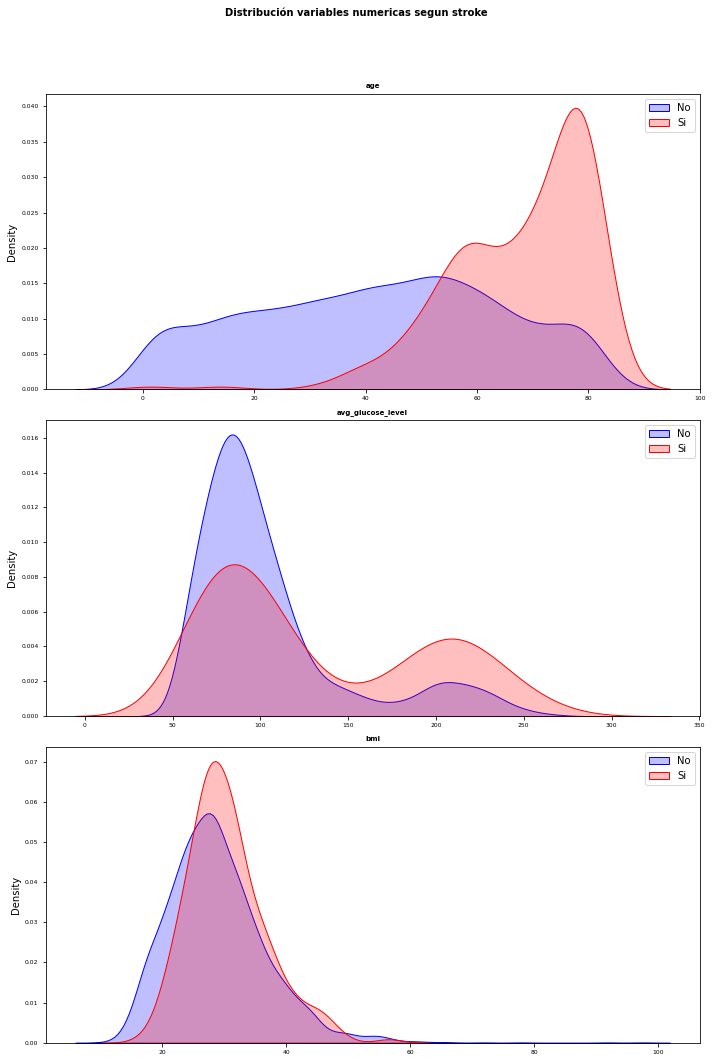

In [44]:
# DISTRIBUCION DE STROKE CON VARIABLES NUMERICAS

fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 15))
axes = axes.flat
columnas = df[['age', 'avg_glucose_level', 'bmi']]

for i, col in enumerate(columnas):
    sns.kdeplot(columnas[col][(df['stroke'] == 0)], color='blue', shade=True, ax=axes[i])
    sns.kdeplot(df[col][(df['stroke'] == 1)], color='red', shade=True, ax=axes[i])
    axes[i].set_title(col, fontsize=7, fontweight="bold")
    axes[i].tick_params(labelsize=6)
    axes[i].set_xlabel("")
    axes[i].legend(['No', 'Si'])

fig.tight_layout()
plt.subplots_adjust(top =0.9)
fig.suptitle('Distribución variables numericas segun stroke', fontsize=10, fontweight="bold");

C:\Users\artur\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\artur\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\artur\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


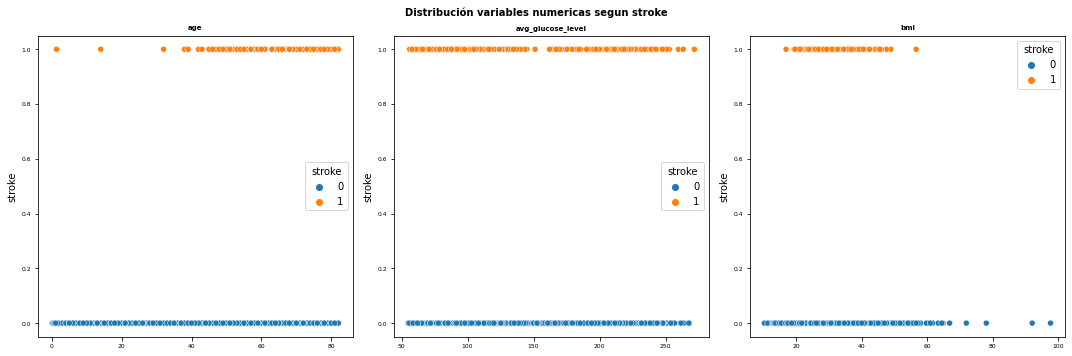

In [97]:
# CORRELACION DE STROKE CON VARIABLES NUMERICAS

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
axes = axes.flat
columnas = df[['age', 'avg_glucose_level', 'bmi']]

for i, col in enumerate(columnas):
    sns.scatterplot(columnas[col], df['stroke'], hue=df['stroke'], ax=axes[i])
    axes[i].set_title(col, fontsize=7, fontweight="bold")
    axes[i].tick_params(labelsize=6)
    axes[i].set_xlabel("")

fig.tight_layout()
plt.subplots_adjust(top =0.9)
fig.suptitle('Distribución variables numericas segun stroke', fontsize=10, fontweight="bold");

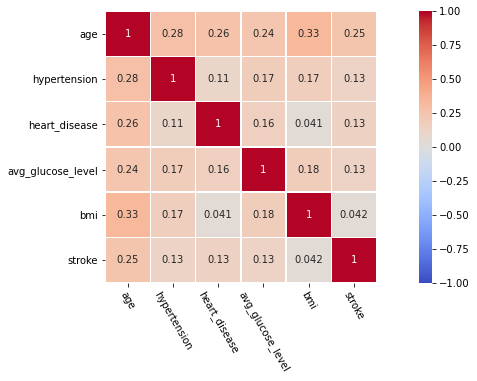

In [22]:
# CORRELACION DE LAS VARIABLES

plt.figure(figsize=(15, 5))
sns.heatmap(df.corr(),
           vmin = -1,
           vmax = 1,
           cmap=sns.color_palette("coolwarm", as_cmap=True),
           square = True,
           linewidths = 0.5,
           annot=True)

plt.xticks(rotation=-60);

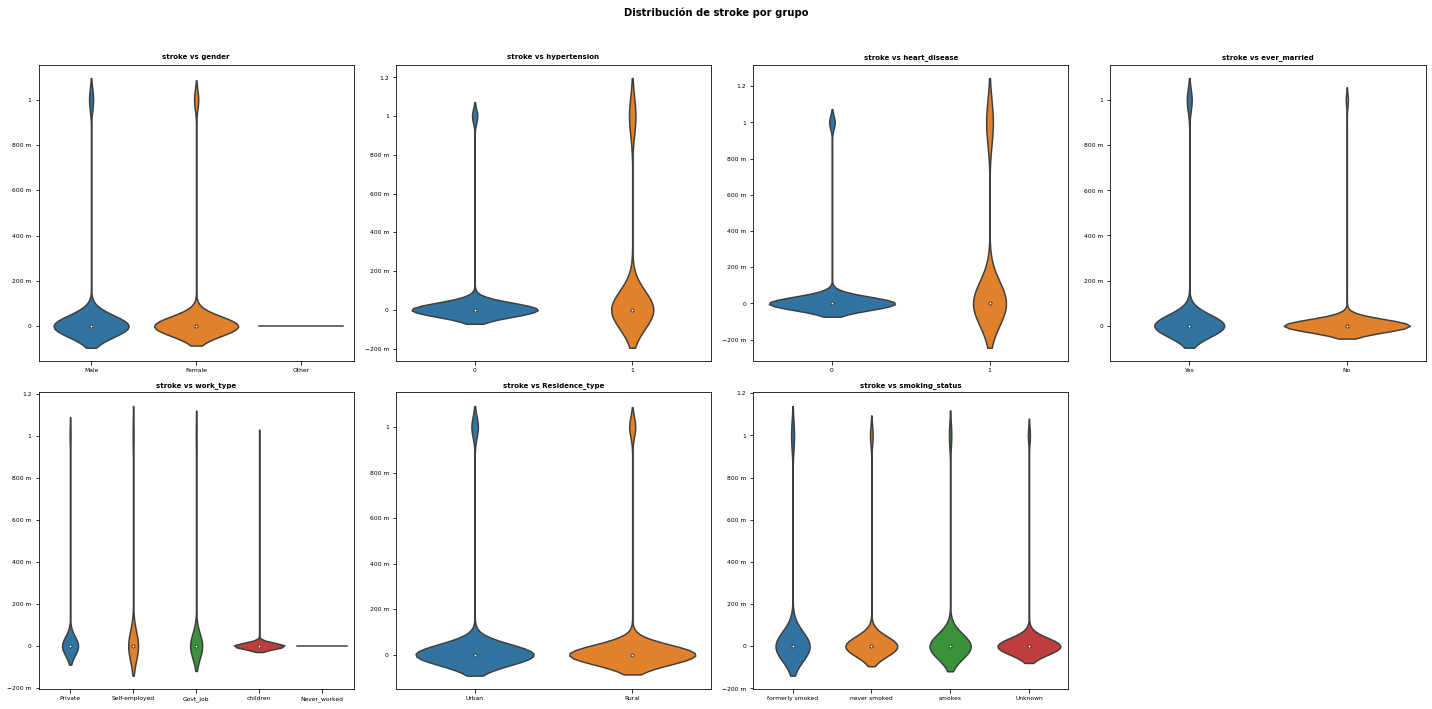

In [102]:
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 10))
axes = axes.flat
columnas = df[['gender', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'smoking_status']]

for i, col in enumerate(columnas):
    sns.violinplot(
        x     = col,
        y     = 'stroke',
        data  = df,
        ax    = axes[i]
    )
    axes[i].set_title(f"stroke vs {col}", fontsize = 7, fontweight = "bold")
    axes[i].yaxis.set_major_formatter(ticker.EngFormatter())
    axes[i].tick_params(labelsize = 6)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")

fig.delaxes(axes[7]) # BORRAR FIGURA EN POSICION 7

fig.tight_layout()
plt.subplots_adjust(top =0.9)
fig.suptitle('Distribución de stroke por grupo', fontsize=10, fontweight="bold");

# PREPROCESADO DE DATOS

In [9]:
# TOTAL DE MISSINGS EN STROKE = 1

print(df[df['stroke'] == 1].count())
print(' ')
print(df[df['stroke'] == 1].isnull().sum())

gender               249
age                  249
hypertension         249
heart_disease        249
ever_married         249
work_type            249
Residence_type       249
avg_glucose_level    249
bmi                  209
smoking_status       249
stroke               249
dtype: int64
 
gender                0
age                   0
hypertension          0
heart_disease         0
ever_married          0
work_type             0
Residence_type        0
avg_glucose_level     0
bmi                  40
smoking_status        0
stroke                0
dtype: int64


In [10]:
# SUSTITUIR EN COLUMNA 'GENDER' FEMALE POR 0 Y MALE POR 1

df.loc[df['gender'] == 'Female', 'gender'] = 0
df.loc[df['gender'] == 'Male', 'gender'] = 1

# SUSTITUIR EN COLUMNA 'EVER_MARRIED' NO POR 0 Y YES POR 1

df.loc[df['ever_married'] == 'No', 'ever_married'] = 0
df.loc[df['ever_married'] == 'Yes', 'ever_married'] = 1

# SUSTITUIR EN COLUMNA 'RESIDENCE TYPE' RURAL POR 0 Y URBAN POR 1

df.loc[df['Residence_type'] == 'Rural', 'Residence_type'] = 0
df.loc[df['Residence_type'] == 'Urban', 'Residence_type'] = 1

In [11]:
# COMPROBAR CON UNA MASCARA SI HAY ALGUNA FILA CON GENDER 'OTHER'

df[df['gender'] == 'Other']

gender   age  hypertension  heart_disease ever_married work_type  \
3116  Other  26.0             0              0            0   Private   

     Residence_type  avg_glucose_level   bmi   smoking_status  stroke  
3116              0             143.33  22.4  formerly smoked       0

In [12]:
# BORRAR FILA CON GENDER 'OTHER'

df.drop(index= 3116, inplace=True)

# RESETEAR LOS VALORES DEL INDICE

df.reset_index(drop = True, inplace = True)

In [13]:
# SEPARAR EN DISTINTAS COLUMNAS LAS DIFERENTES CATEGORIAS DE 'WORK TYPE' Y 'SMOKING STATUS'

df = pd.get_dummies(data=df, columns=['work_type', 'smoking_status'])

In [16]:
# CAMBIAR TIPOS EN COLUMNAS

df = df.astype({
    'gender': 'int64',
    'age': 'int64',
    'ever_married': 'int64',
    'Residence_type':'int64'
})

In [18]:
# RENOMBRAR COLUMNA RESIDENCE_TYPE

df.rename(columns={'Residence_type': 'residence_type'}, inplace=True)

In [21]:
# REORDENAR COLUMNAS

df = df[['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'residence_type', 'avg_glucose_level', 'bmi', 'work_type_Govt_job', 
       'work_type_Never_worked', 'work_type_Private', 'work_type_Self-employed', 
       'work_type_children', 'smoking_status_Unknown', 'smoking_status_formerly smoked',
       'smoking_status_never smoked', 'smoking_status_smokes', 'stroke']]

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5109 entries, 0 to 5108
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   gender                          5109 non-null   int64  
 1   age                             5109 non-null   int64  
 2   hypertension                    5109 non-null   int64  
 3   heart_disease                   5109 non-null   int64  
 4   ever_married                    5109 non-null   int64  
 5   residence_type                  5109 non-null   int64  
 6   avg_glucose_level               5109 non-null   float64
 7   bmi                             4908 non-null   float64
 8   work_type_Govt_job              5109 non-null   uint8  
 9   work_type_Never_worked          5109 non-null   uint8  
 10  work_type_Private               5109 non-null   uint8  
 11  work_type_Self-employed         5109 non-null   uint8  
 12  work_type_children              51

In [24]:
# DIVIDIR EN TRAIN Y TEST

X = df.drop('stroke', axis=1)
y = df['stroke']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
# TAMAÑOS DE SPLITS Y TOTAL DE 1(STROKE) EN Y_TRAIN Y EN Y_TEST

print('Tamaños')
print('-------')
print('X_train:', X_train.shape)
print('X_test:', X_test.shape)
print('y_train:', y_train.shape)
print('y_test:', y_test.shape)
print(' ')
print('Total de stroke en splits')
print('-------------------------')
print('y_train:', y_train[y_train == 1].count())
print('y_test:', y_test[y_test == 1].count())

Tamaños
-------
X_train: (4087, 17)
X_test: (1022, 17)
y_train: (4087,)
y_test: (1022,)
 
Total de stroke en splits
-------------------------
y_train: 187
y_test: 62


In [26]:
X_train.isnull().sum()

gender                              0
age                                 0
hypertension                        0
heart_disease                       0
ever_married                        0
residence_type                      0
avg_glucose_level                   0
bmi                               155
work_type_Govt_job                  0
work_type_Never_worked              0
work_type_Private                   0
work_type_Self-employed             0
work_type_children                  0
smoking_status_Unknown              0
smoking_status_formerly smoked      0
smoking_status_never smoked         0
smoking_status_smokes               0
dtype: int64

In [34]:
# IMPUTAR MISSINGS MEDIANTE KNN

imputer = KNNImputer(n_neighbors=5)

imputer.fit(X_train[['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'residence_type', 'avg_glucose_level', 'bmi', 'work_type_Govt_job', 
       'work_type_Never_worked', 'work_type_Private', 'work_type_Self-employed', 
       'work_type_children', 'smoking_status_Unknown', 'smoking_status_formerly smoked',
       'smoking_status_never smoked', 'smoking_status_smokes']])

X_train[['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'residence_type', 'avg_glucose_level', 'bmi', 'work_type_Govt_job', 
       'work_type_Never_worked', 'work_type_Private', 'work_type_Self-employed', 
       'work_type_children', 'smoking_status_Unknown', 'smoking_status_formerly smoked',
       'smoking_status_never smoked', 'smoking_status_smokes']] = imputer.transform(X_train[['gender', 'age', 'hypertension',                'heart_disease', 'ever_married',
       'residence_type', 'avg_glucose_level', 'bmi', 'work_type_Govt_job', 
       'work_type_Never_worked', 'work_type_Private', 'work_type_Self-employed', 
       'work_type_children', 'smoking_status_Unknown', 'smoking_status_formerly smoked',
       'smoking_status_never smoked', 'smoking_status_smokes']])

<ipython-input-34-d1b7564f2c52>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
C:\Users\artur\Anaconda3\lib\site-packages\pandas\core\indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


In [36]:
# COMPROBAR QUE NO HAY MISSINGS

X_train.isnull().sum()

gender                            0
age                               0
hypertension                      0
heart_disease                     0
ever_married                      0
residence_type                    0
avg_glucose_level                 0
bmi                               0
work_type_Govt_job                0
work_type_Never_worked            0
work_type_Private                 0
work_type_Self-employed           0
work_type_children                0
smoking_status_Unknown            0
smoking_status_formerly smoked    0
smoking_status_never smoked       0
smoking_status_smokes             0
dtype: int64